# Attribution for Dummies

__Intro: The following models help with identifying the ROI of a company's marketing channels.__

 ## Standard Models

 ### Attribution models for marketing channels
 1. Last Touch Attribution
 2. First Touch Attribution
 3. Linear Attribution
 4. Time Decay Attribution
 5. Position-Based Attribution

The first 3 approaches are oversimplified which may lead to overconfidence of the results driven by the marketing channels. This oversight can be detrimental: misguiding future business / marketing decisions.

 ## Advanced Models
 
 1. Markov Chain Attribution
 2. MTA(Not in Notebook)
 3. MMM(Not in Notebook)
 4. Probabilistic Pathing(Not in Notebook)

In [1]:
#load packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
import os

# Load in our data
df = pd.read_csv("Channel_attribution.csv")

# Grab list of columns to iterate through
cols = df.columns

# Iterate through columns to change all ints to str and remove any trailing '.0'
for col in cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].map(lambda x: str(x)[:-2] if '.' in x else str(x))

# Create a total path variable
df['Path'] = ''
for i in df.index:
    #df.at[i, 'Path'] = 'Start'
    for x in cols:
        df.at[i, 'Path'] = df.at[i, 'Path'] + df.at[i, x] + ' > '

# Split path on conversion (channel 21)
df['Path'] = df['Path'].map(lambda x: x.split(' > 21')[0])

# Create conversion value we can sum to get total conversions for each path
df['Conversion'] = 1

# Select relevant columns
df = df[['Path', 'Conversion']]

# Sum conversions by Path
df = df.groupby('Path').sum().reset_index()

# Write DF to CSV to be executed in R
df.to_csv('Paths.csv', index=False)

################### Markov Chain Attribution Model #######################

# Reading in the R code underpinning the Markov Chains using Python's subprocess library.
# The reason for using R is because Python doesn't have a ready-to-use Markov Chain library.

# Call the R script

subprocess.call("R --vanilla --args MarkovOutPutConversionValues.csv <Markov.r> MarkovOutPutConversionValues_out.txt", shell=True)

1

In [3]:
# Load in the CSV file with the model output from R
markov = pd.read_csv('MarkovOutputConversionValues.csv')

# Select only the necessary columns and rename them
markov = markov[['channel_name', 'total_conversions']]
markov.columns = ['Channel', 'Conversion']

In [5]:
markov.shape

(20, 2)

In [6]:
df['First Touch'] = df['Path'].map(lambda x: x.split(' > ')[0])

In [7]:
df

,Path,Conversion,First Touch
0,1 > 1 > 1 > 20,1,1
1,1 > 1 > 12 > 12,1,1
2,1 > 1 > 14 > 13 > 12 > 20,1,1
3,1 > 1 > 3 > 13 > 3 > 20,1,1
4,1 > 1 > 3 > 17 > 17,1,1
5,1 > 1 > 6 > 1 > 12 > 20 > 12,1,1
6,1 > 1 > 8 > 1 > 20 > 8,1,1
7,1 > 10 > 10 > 3 > 20 > 11 > 3,1,1
8,1 > 10 > 12 > 13 > 14 > 16 > 20,1,1
9,1 > 10 > 14 > 13 > 20,1,1


In [8]:
#create an empty data frame
df_ft = pd.DataFrame()

In [9]:
df_ft

""


In [10]:
df_ft['Channel'] = df['First Touch']

In [11]:
df_ft

,Channel
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [12]:
df_ft['Attribution'] = 'First Touch'

In [13]:
df_ft

,Channel,Attribution
0,1,First Touch
1,1,First Touch
2,1,First Touch
3,1,First Touch
4,1,First Touch
5,1,First Touch
6,1,First Touch
7,1,First Touch
8,1,First Touch
9,1,First Touch


In [14]:
df_ft['Conversion'] = 1
df_ft = df_ft.groupby(['Channel', 'Attribution']).sum().reset_index()

In [15]:
df_ft

,Channel,Attribution,Conversion
0,1,First Touch,116
1,10,First Touch,440
2,11,First Touch,50
3,12,First Touch,64
4,13,First Touch,245
5,14,First Touch,32
6,15,First Touch,17
7,16,First Touch,87
8,17,First Touch,28
9,18,First Touch,4


In [16]:
########################## Last Touch Attribution ########################
df['Last Touch'] = df['Path'].map(lambda x: x.split(' > ')[-1])
df_lt = pd.DataFrame()
df_lt['Channel'] = df['Last Touch']
df_lt['Attribution'] = 'Last Touch'
df_lt['Conversion'] = 1
df_lt = df_lt.groupby(['Channel', 'Attribution']).sum().reset_index()


In [17]:
df_lt

,Channel,Attribution,Conversion
0,1,Last Touch,17
1,10,Last Touch,38
2,11,Last Touch,33
3,12,Last Touch,23
4,13,Last Touch,71
5,14,Last Touch,25
6,15,Last Touch,47
7,16,Last Touch,83
8,17,Last Touch,43
9,18,Last Touch,2


In [18]:
######################## Linear Attribution ##############################
channel = []
conversion = []
for i in df.index:
    for j in df.at[i, 'Path'].split(' > '):
        channel.append(j)
        conversion.append(1/len(df.at[i, 'Path'].split(' > ')))
lin_att_df = pd.DataFrame()
lin_att_df['Channel'] = channel
lin_att_df['Attribution'] = 'Linear'
lin_att_df['Conversion'] = conversion
lin_att_df = lin_att_df.groupby(['Channel', 'Attribution']).sum().reset_index()

In [19]:
lin_att_df

,Channel,Attribution,Conversion
0,1,Linear,66.873661
1,10,Linear,168.222393
2,11,Linear,88.625714
3,12,Linear,67.961197
4,13,Linear,161.356219
5,14,Linear,51.752410
6,15,Linear,56.492558
7,16,Linear,123.882419
8,17,Linear,67.250513
9,18,Linear,5.026587


In [20]:
################################# Graphing ################################
# Concatenate the four data frames to a single data frame
df_total_attr = pd.concat([df_ft, df_lt, lin_att_df, markov])

/Users/kudzayimabuto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
df_total_attr

,Attribution,Channel,Conversion
0,First Touch,1,116.000000
1,First Touch,10,440.000000
2,First Touch,11,50.000000
3,First Touch,12,64.000000
4,First Touch,13,245.000000
5,First Touch,14,32.000000
6,First Touch,15,17.000000
7,First Touch,16,87.000000
8,First Touch,17,28.000000
9,First Touch,18,4.000000


In [22]:
df_total_attr['Channel'] = df_total_attr['Channel'].astype(int)
df_total_attr.sort_values(by='Channel', ascending=True, inplace=True)

In [23]:
df_total_attr

,Attribution,Channel,Conversion
0,First Touch,1,116.000000
0,NaN,1,1196.000000
0,Last Touch,1,17.000000
0,Linear,1,66.873661
11,Linear,2,79.945001
11,Last Touch,2,18.000000
12,NaN,2,0.000000
11,First Touch,2,166.000000
13,Last Touch,3,21.000000
13,Linear,3,94.626344


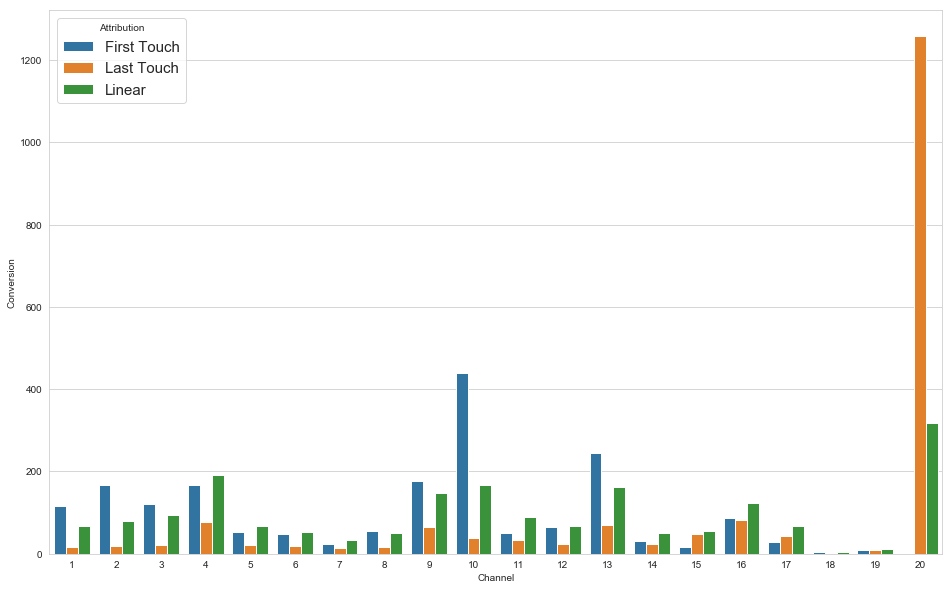

In [24]:
# Visualize the attributions
sns.set_style("whitegrid")
plt.rc('legend', fontsize=15)
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x='Channel', y='Conversion', hue='Attribution', data=df_total_attr)
plt.show()

In [26]:
######### Using the heatmap to visualize how the different channels affect the potential user journeys ##########

# Read in transition matrix CSV
trans_prob = pd.read_csv('MarkovOutputTransitionMatrix.csv')

In [27]:
trans_prob

,channel_from,channel_to,transition_probability
0,(start),1,0.054348
1,(start),10,0.228679
2,(start),11,0.027592
3,(start),12,0.031355
4,(start),13,0.133779
5,(start),14,0.014214
6,(start),15,0.009197
7,(start),16,0.046405
8,(start),17,0.012960
9,(start),18,0.001672


In [28]:
# Convert data to floats
trans_prob ['transition_probability'] = trans_prob ['transition_probability'].astype(float)

In [29]:
# Convert start and conversion event to numeric values so we can sort and iterate through
trans_prob .replace('(start)', '0', inplace=True)
trans_prob .replace('(conversion)', '21', inplace=True)

In [30]:
trans_prob

,channel_from,channel_to,transition_probability
0,0,1,0.054348
1,0,10,0.228679
2,0,11,0.027592
3,0,12,0.031355
4,0,13,0.133779
5,0,14,0.014214
6,0,15,0.009197
7,0,16,0.046405
8,0,17,0.012960
9,0,18,0.001672


In [37]:
# Get unique origin channels
channel_from_unique = trans_prob ['channel_from'].unique().tolist()
channel_from_unique.sort(key=float)

In [36]:
# Get unique destination channels
channel_to_unique = trans_prob ['channel_to'].unique().tolist()
channel_to_unique.sort(key=float)

In [38]:
# Create new matrix with origin and destination channels as columns and index
trans_matrix = pd.DataFrame(columns=channel_to_unique, index=channel_from_unique)

In [40]:
# Assign the probabilities to the corresponding cells in our transition matrix
for f in channel_from_unique:
    for t in channel_to_unique:
        x = trans_prob [(trans_prob ['channel_from'] == f) & (trans_prob ['channel_to'] == t)]
        prob = x['transition_probability'].values
        if prob.size > 0:
            trans_matrix[t][f] = prob[0]
        else:
            trans_matrix[t][f] = 0

In [41]:
trans_matrix

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,0.0543478,0.083194,0.0702341,0.0965719,0.0259197,0.020903,0.0108696,0.0234114,0.104515,0.228679,...,0.0313545,0.133779,0.014214,0.00919732,0.0464047,0.0129599,0.00167224,0.0041806,0,0
1,0,0.134615,0.101648,0.123626,0.0247253,0.043956,0.0137363,0.0549451,0.0576923,0.0521978,...,0.0384615,0.043956,0.0137363,0.0137363,0.043956,0.0137363,0.00274725,0.00824176,0.142857,0.0494505
2,0.102326,0,0.0860465,0.15814,0.0232558,0.0162791,0.0116279,0.0116279,0.072093,0.0744186,...,0.027907,0.0651163,0.00697674,0.0116279,0.0604651,0.0232558,0,0.00232558,0.155814,0.0418605
3,0.0337478,0.026643,0,0.193606,0.0497336,0.0373002,0.0213144,0.0319716,0.136767,0.0284192,...,0.0106572,0.035524,0.0248668,0.0159858,0.071048,0.0159858,0.0017762,0.0017762,0.165187,0.0373002
4,0.0232959,0.0198447,0.0405522,0,0.0819672,0.0388266,0.0120794,0.0232959,0.0811044,0.0578085,...,0.0388266,0.106126,0.0232959,0.0155306,0.0724763,0.0241588,0.00172563,0.00603969,0.188093,0.0759275
5,0.0190217,0.0163043,0.0298913,0.133152,0,0.0543478,0.0326087,0.0326087,0.0733696,0.0706522,...,0.0326087,0.0842391,0.0353261,0.0244565,0.0516304,0.0190217,0,0,0.157609,0.0625
6,0.0322581,0.0179211,0.0537634,0.129032,0.0645161,0,0.107527,0.0430108,0.0860215,0.0860215,...,0.0250896,0.0394265,0.0215054,0.00716846,0.0394265,0.0286738,0,0,0.0860215,0.0716846
7,0.0331492,0.00552486,0.038674,0.0883978,0.038674,0.0497238,0,0.176796,0.104972,0.0497238,...,0.0276243,0.038674,0.0220994,0.0165746,0.0165746,0,0.00552486,0.00552486,0.138122,0.0828729
8,0.0299625,0.0337079,0.0337079,0.0786517,0.0337079,0.0561798,0.0337079,0,0.0898876,0.0486891,...,0.0561798,0.0786517,0.0224719,0.0224719,0.0411985,0.0187266,0.00374532,0.00374532,0.183521,0.0636704
9,0.0220674,0.0243902,0.0569106,0.197445,0.0150987,0.0139373,0.0127758,0.0150987,0,0.0662021,...,0.0255517,0.0511034,0.00813008,0.0255517,0.0859466,0.0255517,0.00116144,0.00116144,0.180023,0.0824623


In [42]:
# Convert all probabilities to floats
trans_matrix = trans_matrix.apply(pd.to_numeric)

In [43]:
trans_matrix

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,0.054348,0.083194,0.070234,0.096572,0.025920,0.020903,0.010870,0.023411,0.104515,0.228679,...,0.031355,0.133779,0.014214,0.009197,0.046405,0.012960,0.001672,0.004181,0.000000,0.000000
1,0.000000,0.134615,0.101648,0.123626,0.024725,0.043956,0.013736,0.054945,0.057692,0.052198,...,0.038462,0.043956,0.013736,0.013736,0.043956,0.013736,0.002747,0.008242,0.142857,0.049451
2,0.102326,0.000000,0.086047,0.158140,0.023256,0.016279,0.011628,0.011628,0.072093,0.074419,...,0.027907,0.065116,0.006977,0.011628,0.060465,0.023256,0.000000,0.002326,0.155814,0.041860
3,0.033748,0.026643,0.000000,0.193606,0.049734,0.037300,0.021314,0.031972,0.136767,0.028419,...,0.010657,0.035524,0.024867,0.015986,0.071048,0.015986,0.001776,0.001776,0.165187,0.037300
4,0.023296,0.019845,0.040552,0.000000,0.081967,0.038827,0.012079,0.023296,0.081104,0.057808,...,0.038827,0.106126,0.023296,0.015531,0.072476,0.024159,0.001726,0.006040,0.188093,0.075928
5,0.019022,0.016304,0.029891,0.133152,0.000000,0.054348,0.032609,0.032609,0.073370,0.070652,...,0.032609,0.084239,0.035326,0.024457,0.051630,0.019022,0.000000,0.000000,0.157609,0.062500
6,0.032258,0.017921,0.053763,0.129032,0.064516,0.000000,0.107527,0.043011,0.086022,0.086022,...,0.025090,0.039427,0.021505,0.007168,0.039427,0.028674,0.000000,0.000000,0.086022,0.071685
7,0.033149,0.005525,0.038674,0.088398,0.038674,0.049724,0.000000,0.176796,0.104972,0.049724,...,0.027624,0.038674,0.022099,0.016575,0.016575,0.000000,0.005525,0.005525,0.138122,0.082873
8,0.029963,0.033708,0.033708,0.078652,0.033708,0.056180,0.033708,0.000000,0.089888,0.048689,...,0.056180,0.078652,0.022472,0.022472,0.041199,0.018727,0.003745,0.003745,0.183521,0.063670
9,0.022067,0.024390,0.056911,0.197445,0.015099,0.013937,0.012776,0.015099,0.000000,0.066202,...,0.025552,0.051103,0.008130,0.025552,0.085947,0.025552,0.001161,0.001161,0.180023,0.082462


In [44]:
# Rename our start and conversion events
trans_matrix.rename(index={'0': 'Start'}, inplace=True)
trans_matrix.rename(columns={'21': 'Conversion'}, inplace=True)

In [45]:
trans_matrix

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,Conversion
Start,0.054348,0.083194,0.070234,0.096572,0.025920,0.020903,0.010870,0.023411,0.104515,0.228679,...,0.031355,0.133779,0.014214,0.009197,0.046405,0.012960,0.001672,0.004181,0.000000,0.000000
1,0.000000,0.134615,0.101648,0.123626,0.024725,0.043956,0.013736,0.054945,0.057692,0.052198,...,0.038462,0.043956,0.013736,0.013736,0.043956,0.013736,0.002747,0.008242,0.142857,0.049451
2,0.102326,0.000000,0.086047,0.158140,0.023256,0.016279,0.011628,0.011628,0.072093,0.074419,...,0.027907,0.065116,0.006977,0.011628,0.060465,0.023256,0.000000,0.002326,0.155814,0.041860
3,0.033748,0.026643,0.000000,0.193606,0.049734,0.037300,0.021314,0.031972,0.136767,0.028419,...,0.010657,0.035524,0.024867,0.015986,0.071048,0.015986,0.001776,0.001776,0.165187,0.037300
4,0.023296,0.019845,0.040552,0.000000,0.081967,0.038827,0.012079,0.023296,0.081104,0.057808,...,0.038827,0.106126,0.023296,0.015531,0.072476,0.024159,0.001726,0.006040,0.188093,0.075928
5,0.019022,0.016304,0.029891,0.133152,0.000000,0.054348,0.032609,0.032609,0.073370,0.070652,...,0.032609,0.084239,0.035326,0.024457,0.051630,0.019022,0.000000,0.000000,0.157609,0.062500
6,0.032258,0.017921,0.053763,0.129032,0.064516,0.000000,0.107527,0.043011,0.086022,0.086022,...,0.025090,0.039427,0.021505,0.007168,0.039427,0.028674,0.000000,0.000000,0.086022,0.071685
7,0.033149,0.005525,0.038674,0.088398,0.038674,0.049724,0.000000,0.176796,0.104972,0.049724,...,0.027624,0.038674,0.022099,0.016575,0.016575,0.000000,0.005525,0.005525,0.138122,0.082873
8,0.029963,0.033708,0.033708,0.078652,0.033708,0.056180,0.033708,0.000000,0.089888,0.048689,...,0.056180,0.078652,0.022472,0.022472,0.041199,0.018727,0.003745,0.003745,0.183521,0.063670
9,0.022067,0.024390,0.056911,0.197445,0.015099,0.013937,0.012776,0.015099,0.000000,0.066202,...,0.025552,0.051103,0.008130,0.025552,0.085947,0.025552,0.001161,0.001161,0.180023,0.082462


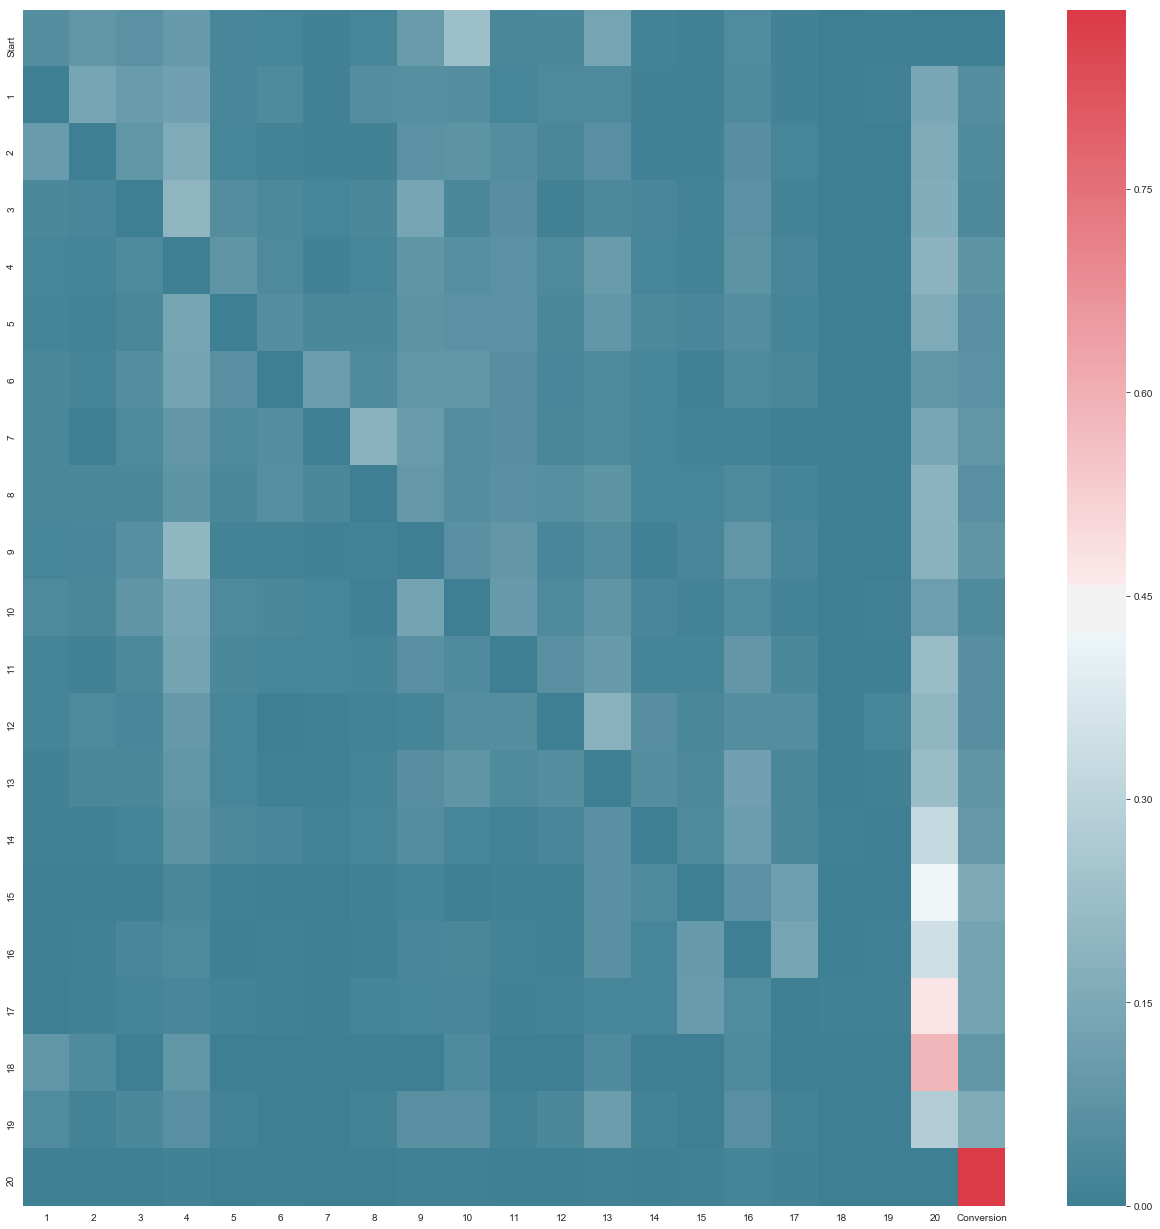

In [48]:
# Visualize this transition matrix in a heatmap
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(trans_matrix, cmap=sns.diverging_palette(220,10, as_cmap=True))
plt.show()